# Fashion MNIST

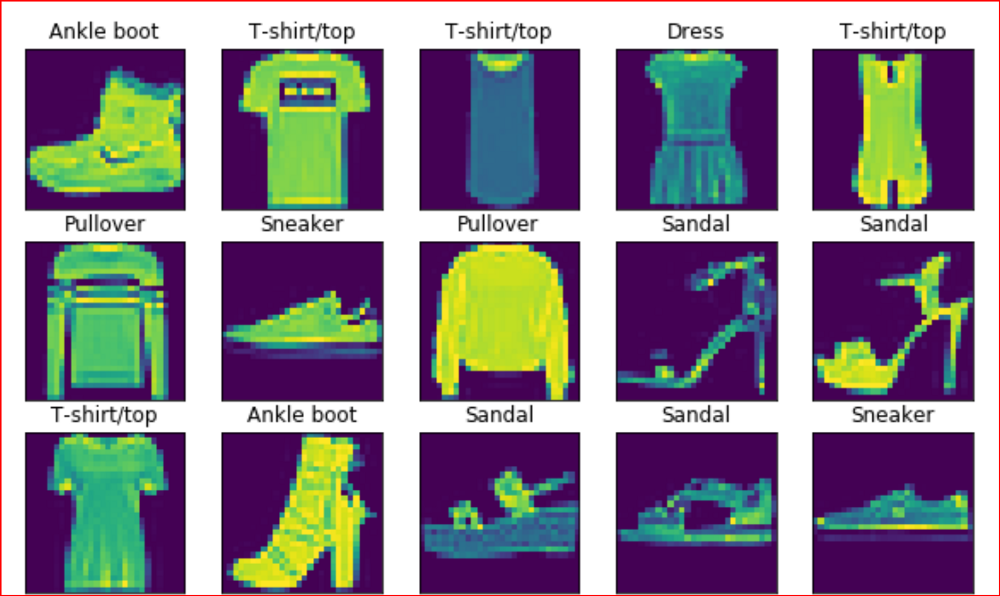

# Read library and datasets

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout,LeakyReLU,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
df_train=pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv")
df_test=pd.read_csv("../input/fashionmnist/fashion-mnist_test.csv")

# Sample fashion from data

In [ ]:
x=df_train.drop(['label'],axis=1)

In [ ]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='summer')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(x.iloc[53,:].as_matrix().reshape(28,28), ax)
plt.title('Shirt\n',fontweight='bold',fontsize=20)
plt.axis("off")
plt.show()

In [ ]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='ocean')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(x.iloc[10,:].as_matrix().reshape(28,28), ax)
plt.title('T-shirt\n',fontweight='bold',fontsize=20)
plt.axis("off")
plt.show()

# Preparation for the model

In [ ]:
train=np.array(df_train,dtype="float32")
test=np.array(df_test,dtype="float32")

In [ ]:
print('to_categorical = ',len(df_train.label.unique()))

In [ ]:
x_train=train[:,1:]
y_train=to_categorical(train[:,0])
x_test=test[:,1:]
y_test=to_categorical(test[:,0])

In [ ]:
img_rows= 28
img_cols= 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
img_shape = (img_rows, img_cols, 1)

In [ ]:
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)

In [ ]:
x_train=x_train/255
x_test=x_test/255

# Create Model

In [ ]:
cnn_model = Sequential()

In [ ]:
cnn_model.add(Conv2D(256, kernel_size=(3, 3),input_shape=img_shape))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(BatchNormalization())
cnn_model.add(LeakyReLU(0.1))
cnn_model.add(Dropout(0.1))

cnn_model.add(Conv2D(128, (3, 3)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.1))
cnn_model.add(LeakyReLU(0.1))

In [ ]:
cnn_model.add(Flatten())
cnn_model.add(Dense(256))
cnn_model.add(LeakyReLU(0.1))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.1))
cnn_model.add(Dense(10, activation='softmax'))
cnn_model.summary()

In [ ]:
cnn_model.compile(optimizer='adamax',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator()
datagen.get_random_transform(img_shape=(28,28,1),seed=3)
datagen.flow(x=x_train, y=y_train, batch_size=25, shuffle=True, sample_weight=None, seed=None, save_to_dir=None, save_prefix='', save_format='png', subset=None)

datagen.fit(x_train)

In [ ]:
information=cnn_model.fit(x_train, y_train, batch_size=25 ,epochs=20,verbose=1,validation_data=(x_test, y_test))

In [ ]:
plt.figure(figsize=(15,10))
plt.style.use('dark_background')
plt.plot(information.history["val_loss"],linewidth=4, color='lightgreen',label="Validation Loss")
plt.plot(information.history["loss"],linewidth=4, color='violet',label="Train Loss")
plt.title("Train - Test Loss")
plt.xlabel("Number Of Epochs",fontsize=25)
plt.ylabel("Loss",fontsize=25)
plt.grid(True)
plt.legend()
plt.show()

# Results

In [ ]:
print("Model Score: ",cnn_model.evaluate(x_test, y_test, verbose=0))

In [ ]:
y_head=cnn_model.predict(x_test)
y_predict=np.argmax(y_head, axis=1)
y_true = np.argmax(y_test,axis=1)

In [ ]:
import seaborn as sb
from sklearn.metrics import confusion_matrix
con_mat=confusion_matrix(y_true,y_predict)
plt.style.use('seaborn-deep')
plt.figure(figsize=(15,15))
sb.heatmap(con_mat,annot=True,annot_kws={'size': 25},linewidths=0.5,fmt="d",cmap="rainbow")
plt.title('True or False predicted clothing\n',fontweight='bold',fontsize=20)
plt.show()

Each training and test example is assigned to one of the following labels:

0 - T-shirt/top

1 - Trouser      

2 - Pullover      

3 - Dress    

4 - Coat      

5 - Sandal      

6 - Shirt      

7 - Sneaker      

8 - Bag   

9 - Ankle boot   

In [ ]:
comparison=pd.DataFrame()
comparison["prediction"]=y_predict
comparison["true"]=y_true
comparison['correct'] = comparison.prediction == comparison.true 
comparison["correct"].value_counts()
comparison[comparison['correct']==False]